In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Create a dataset

# Set random seed
np.random.seed(42)

# Number of samples
num_samples = 550

# Generate normal distributed CGPA around 7.0 with std deviation 1.0
cgpa = np.clip(np.random.normal(7.0, 1.0, num_samples), 5.0, 10.0)

# Generate normal distributed Score around 500 with std deviation 100
score = np.clip(np.random.normal(500, 100, num_samples), 200, 800)

# Linear rule: if (CGPA * 10 + Score) > 1200 → Placed = 1
placed = []
for i in range(num_samples):
    decision_boundary = cgpa[i]*10 + score[i]
    if decision_boundary> 600:
        placed.append(1)
    else:
        placed.append(0)


# Create DataFrame
dataset = pd.DataFrame({
    'CGPA': cgpa,
    'Score': score,
    'Placed': placed
})

# Show a sample
dataset.head()

,CGPA,Score,Placed
0,7.496714,508.658979,0
1,6.861736,484.432276,0
2,7.647689,616.778206,1
3,8.523030,525.442084,1
4,6.765847,533.760266,1


In [32]:
#check the null value
dataset.isnull().sum()

CGPA      0
Score     0
Placed    0
dtype: int64

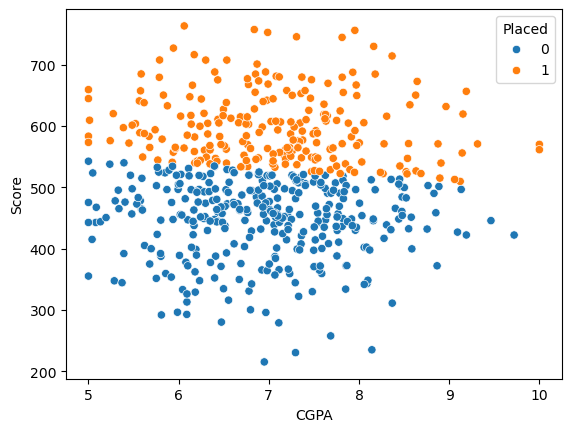

In [31]:
# plot the graph for distribution check

sns.scatterplot(x='CGPA', y= 'Score', data= dataset, hue='Placed')
plt.show()

In [33]:
# input and output variables
x = dataset.iloc[:, :-1]
y = dataset['Placed']

In [34]:
#train test split data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

## Apply the Gaussian, Multinomial and Bernoulli Theorem

In [44]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from mlxtend.plotting import plot_decision_regions

## 1: Gaussian NB

In [36]:
gnp = GaussianNB()
gnp.fit(x_train, y_train)

GaussianNB()

In [ ]:
# check the score
gnp.score(x_test, y_test)

0.9818181818181818

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


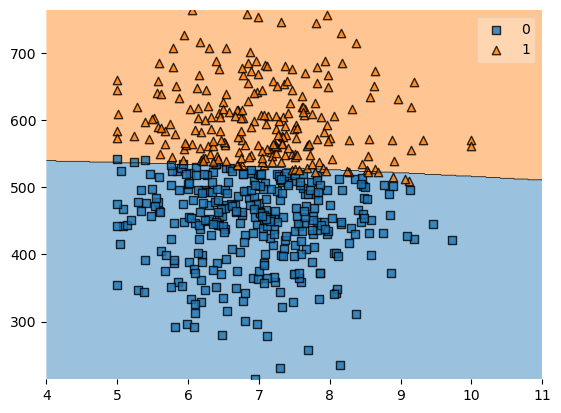

In [47]:
# decision regions preparing
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf= gnp)
plt.show()

## 2: Multinomial NB

In [39]:
mnp = MultinomialNB()
mnp.fit(x_train, y_train)

MultinomialNB()

In [40]:
# check the accuracy
mnp.score(x_test, y_test)

0.8454545454545455

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


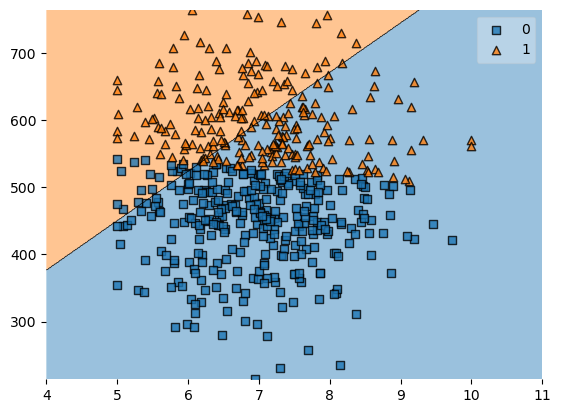

In [48]:
# decision regions preparing
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf= mnp)
plt.show()

## 3: Bernoulli NB

In [41]:
bnp = BernoulliNB()
bnp.fit(x_train, y_train)

BernoulliNB()

In [42]:
# check the accuracy
bnp.score(x_test, y_test)

0.6363636363636364

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


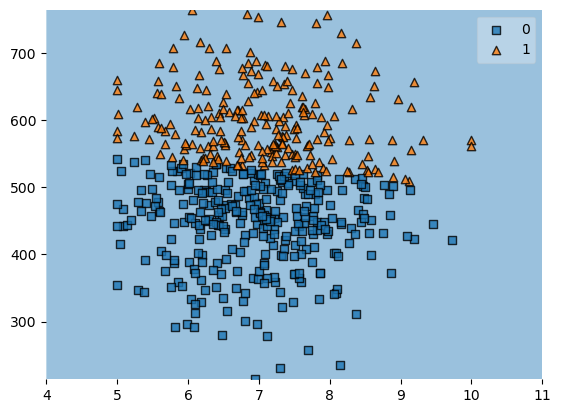

In [49]:
# decision regions preparing
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf= bnp)
plt.show()